# A day with *(the)* Julia *(language)*  

## Análisis de datos   
   

[**JuliaStats**](http://juliastats.github.io/) **Statistics** and **Machine Learning** made easy in Julia.

In [29]:
# Pkg.add("DataFrames")

In [30]:
using DataFrames # DataFrames to represent tabular datasets
                 # Database-style joins and indexing
                 # Split-apply-combine operations, reshape and pivoting
                 # Formula and model frames

##### [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [31]:
run(`head data/iris.csv`)

"SepalLength","SepalWidth","PetalLength","PetalWidth","Species"
5.1,3.5,1.4,0.2,"setosa"
4.9,3.0,1.4,0.2,"setosa"
4.7,3.2,1.3,0.2,"setosa"
4.6,3.1,1.5,0.2,"setosa"
5.0,3.6,1.4,0.2,"setosa"
5.4,3.9,1.7,0.4,"setosa"
4.6,3.4,1.4,0.3,"setosa"
5.0,3.4,1.5,0.2,"setosa"
4.4,2.9,1.4,0.2,"setosa"


In [32]:
iris = readtable("data/iris.csv")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


Descripción (estadística) del dataset (columnas), similar a `summary` de *R*.

In [33]:
describe(iris)

SepalLength
Min      4.3
1st Qu.  5.1
Median   5.8
Mean     5.843333333333334
3rd Qu.  6.4
Max      7.9
NAs      0
NA%      0.0%

SepalWidth
Min      2.0
1st Qu.  2.8
Median   3.0
Mean     3.0573333333333332
3rd Qu.  3.3
Max      4.4
NAs      0
NA%      0.0%

PetalLength
Min      1.0
1st Qu.  1.6
Median   4.35
Mean     3.7579999999999996
3rd Qu.  5.1
Max      6.9
NAs      0
NA%      0.0%

PetalWidth
Min      0.1
1st Qu.  0.3
Median   1.3
Mean     1.1993333333333331
3rd Qu.  1.8
Max      2.5
NAs      0
NA%      0.0%

Species
Length  150
Type    UTF8String
NAs     0
NA%     0.0%
Unique  3



In [34]:
using Gadfly # Similar a ggplot2 de R

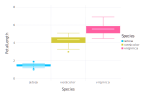

In [35]:
plot(iris, x="Species", y="PetalLength", color="Species", Geom.boxplot)

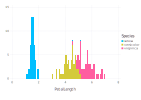

In [36]:
plot(iris, color="Species", x="PetalLength", Geom.histogram)

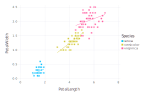

In [37]:
plot(iris, x=:PetalLength, y=:PetalWidth, color=:Species, Geom.point, Geom.smooth(method=:lm))

In [38]:
# Pkg.add("GLM")

In [39]:
using GLM # Generalized linear models

linear = fit(LinearModel, PetalWidth ~ PetalLength, iris) # PetalLength en R: 0.4157554 

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.DensePredQR{Float64}},Float64}:

Coefficients:
              Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -0.363076   0.039762 -9.13122   <1e-15
PetalLength   0.415755 0.00958244  43.3872   <1e-85


In [40]:
using Clustering

In [41]:
cl = kmeans(convert(Matrix{Float64}, iris[:, [:PetalWidth, :PetalLength]])', 3)

Clustering.KmeansResult{Float64}(2x3 Array{Float64,2}:
 2.0375   0.246  1.34231
 5.59583  1.462  4.26923,[2,2,2,2,2,2,2,2,2,2  …  1,1,1,1,1,1,1,1,1,1],[0.00596,0.00596,0.02836,0.00356,0.00596,0.08036,0.00676,0.00356,0.00596,0.02276  …  0.131424,0.314757,0.264757,0.161424,0.224757,0.22559,0.373924,0.15809,0.107257,0.302257],[48,50,52],[48.0,50.0,52.0],31.371358974358984,5,true)

In [42]:
cl.centers

2x3 Array{Float64,2}:
 2.0375   0.246  1.34231
 5.59583  1.462  4.26923

In [43]:
by(iris, :Species, df -> (mean(df[:PetalWidth]), mean(df[:PetalLength])))

,Species,x1
1,setosa,"(0.24600000000000002,1.462)"
2,versicolor,"(1.3259999999999998,4.260000000000001)"
3,virginica,"(2.026,5.5520000000000005)"
